In [1]:
import numpy as np 
import pandas as pd 
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import scikitplot.plotters as skplt
import warnings

In [2]:
def plot_cmat(yte, ypred):
    '''Plotting confusion matrix'''
    skplt.plot_confusion_matrix(yte,ypred)
    plt.show()

In [3]:
# Import dataset for training using Pandas
#news = pd.read_csv('datasets/data.csv')
#test_news = pd.read_csv('datasets/data.csv')
#title = news['title'].astype('U')
#text = news['text'].astype('U')
#label = news['label'].astype('U')
#test_label = test_news['label'].astype('U')
import pandas as pd 
news = pd.read_csv('datasets/malay.csv')
test_news = pd.read_csv('datasets/test-malay.csv')
#news[0] = [" ".join(text) for text in news[0].values]
news.head(10)
#news['text'] = news[0]
#news['label'] = news[1]
text = news['text']
label = news['label']
test_text = test_news['text']
test_label = test_news['label']


#title_text = title + ' ' + text
# title_text.head()
#count_row = news.shape[0]
#print(count_row)
#count_test_row = test_news.shape[0]
print(label.value_counts())
print(test_label.value_counts())
#print(test_label.value_counts())
# test_news.count()

Valid    365
Hoax     222
Name: label, dtype: int64
Valid    159
Hoax      86
Name: label, dtype: int64


In [4]:
#check_nan_in_df = news.isnull()
#print (check_nan_in_df)

In [5]:
# Splitting the dataset into test and train
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2, random_state=7)

In [6]:
# Insert spliitted data into TfidfVectorizer and transform shape
vectorizer = TfidfVectorizer(max_df=0.7)

In [7]:
transformed_text_train = vectorizer.fit_transform(text)
transformed_text_test = vectorizer.transform(test_text)
filename_vectorizer = 'TfidfVectorizer-Malay.sav'
pickle.dump(vectorizer, open(filename_vectorizer, 'wb')) # Saving model

Accuracy Score: 84.90%
K Fold Accuracy: 56.33%

Classification Report
              precision    recall  f1-score   support

        Hoax       0.83      0.72      0.77        86
       Valid       0.86      0.92      0.89       159

    accuracy                           0.85       245
   macro avg       0.84      0.82      0.83       245
weighted avg       0.85      0.85      0.85       245


Confusion Matrix
[[ 62  24]
 [ 13 146]]


E:\MachineLearning\FakeNewsClassifier\env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


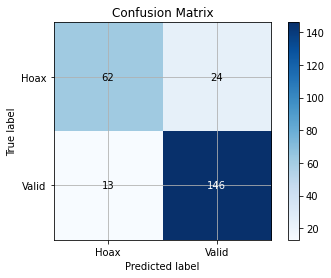

In [8]:
# Initialize Classifier
classifier = PassiveAggressiveClassifier(max_iter=100)

classifier.fit(transformed_text_train, label)

# Start Predict
predict = classifier.predict(transformed_text_test)

filename = 'ClassifierModel-Malay.sav'
pickle.dump(classifier, open(filename, 'wb')) # Saving model

# Get Accuracy Score
score = accuracy_score(test_label, predict)
print("Accuracy Score: %.2f%%" % (score*100))

X = vectorizer.transform(test_text)
kscore = cross_val_score(classifier, X, test_label.values, cv=5)
print(f'K Fold Accuracy: {round(kscore.mean()*100,2)}%')

print("\nClassification Report")
print(classification_report(test_label, predict))

print("\nConfusion Matrix")
print(confusion_matrix(test_label, predict))

plot_cmat(test_label, predict) # Show Confusion Matrix

accuracy:   0.706
[[ 14  72]
 [  0 159]]


E:\MachineLearning\FakeNewsClassifier\env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


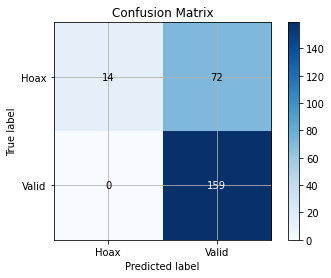

In [9]:
#Applying Naive Bayes
naive_classifier = MultinomialNB() 
naive_classifier.fit(transformed_text_train, label)                       # Fit Naive Bayes classifier according to X, y
pred = naive_classifier.predict(transformed_text_test)                     # Perform classification on an array of test vectors X.
naive_score = metrics.accuracy_score(test_label, pred)
print("accuracy:   %0.3f" % naive_score)
cm = metrics.confusion_matrix(test_label, pred)
print(cm)
plot_cmat(test_label, pred) # Show Confusion Matrix